In [1]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

In [2]:
df_all = pd.read_parquet(
    "datas/分析完成的新聞/HF_reuters_by_ashraq_headline_V4_合併0-2500.parquet"
    # "datas/分析完成的新聞_只有分數/HF_reuters_by_dani_scored_合併0-16000.parquet"
)

In [42]:
df_Reu = pd.read_parquet(
    "datas/分析完成的新聞_只有分數/HF_financial_ashraq_Reuters_scored_合併0-2400.parquet"
)
df_CNBC = pd.read_parquet(
    "datas/分析完成的新聞_只有分數/HF_financial_ashraq_CNBC_scored_合併0-2400.parquet"
)
df_CNBC["date"] = df_CNBC["date+1"]
df_CNBC = df_CNBC.drop("date+1", axis=1)

df_all = pd.concat([df_Reu, df_CNBC])

In [8]:
df_all.head(2)

,title,text,url,date,llama_score,llama_reason
0,METALS-Cold weather heats up lead metal market,"January 4, 2018 / 203 AM / Updated 9 minutes a...",https://www.reuters.com/article/global-metals/...,2018/01/04 02:03:00,0.03,The news article discusses the lead metal mark...
1,Daily Briefing: Brexit bill set for Lords; new...,"January 17, 2018 / 832 AM / Updated 25 minutes...",https://uk.reuters.com/article/uk-europe-view-...,2018/01/17 08:32:00,-0.30,The news article discusses several key events ...


In [63]:
df_all[
    [
        "Headline",
        "date",
        "MarketSentimentScore",
    ]
]

,Headline,date,MarketSentimentScore
0,Stocks rise on oil drop; election worry lingers,2006/11/13 14:09:00,0.02
1,"Gannett, Greenberg pursuing Tribune: reports",2006/11/13 02:26:00,0.01
2,Instant View: March nonfarm payrolls rose by 8...,2013/04/05 08:56:00,-0.60
3,S&P posts 2013's worst weekly drop on jobs data,2013/04/05 16:52:00,-0.43
4,Weak job gains hurt economic outlook,2013/04/05 18:36:00,-0.70
...,...,...,...
4537,Wall Street ends flat after late fade; S&P up ...,2013/02/28 16:46:00,0.23
4538,"Russia slashes economic growth forecasts, seco...",2013/08/26 11:02:00,0.40
4539,Wall Street ends lower after Kerry blasts Syri...,2013/08/26 17:05:00,-0.35
4540,Weak U.S. durable goods data dims growth outlook,2013/08/26 12:07:00,-0.80


In [5]:
df_all.shape

(2541, 6)

In [3]:
df_all.isna().sum()

title            0
text             0
url              0
date             0
llama_score     34
llama_reason    34
dtype: int64

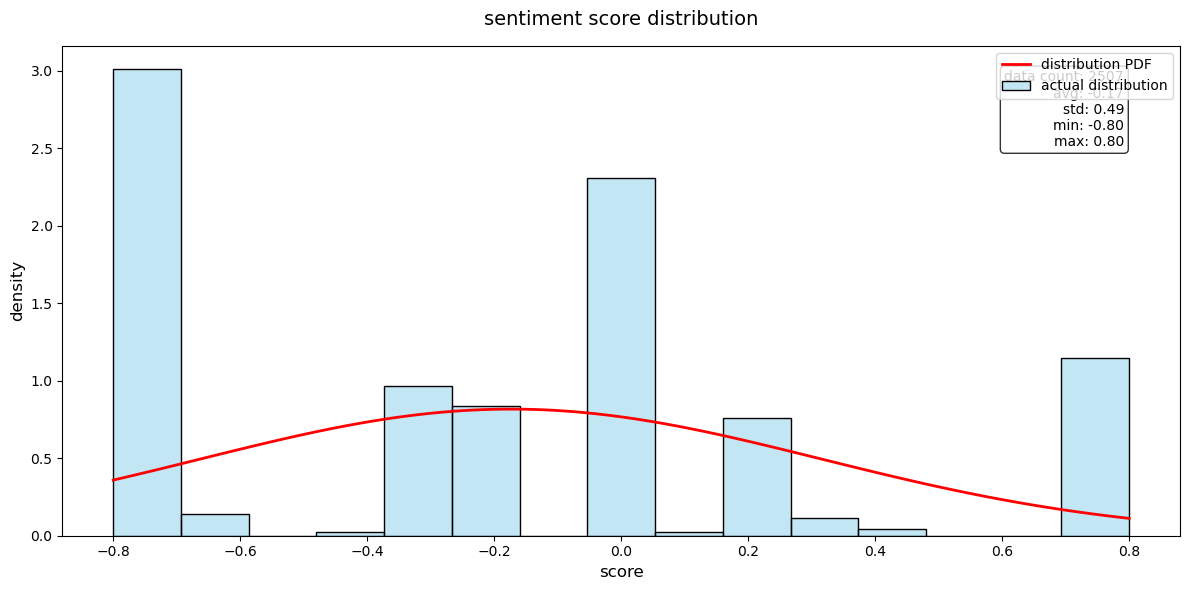

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


sentiment_series = pd.Series(df_all["llama_score"], index=df_all.index)
sentiment_series = sentiment_series.dropna()  # 移除NaN值

# 設置圖表風格和大小
plt.style.use("default")
plt.figure(figsize=(12, 6))

# 繪製直方圖和密度曲線
sns.histplot(
    data=sentiment_series,
    stat="density",
    alpha=0.5,
    label="actual distribution",
    color="skyblue",
)

# 計算正態分布曲線
x = np.linspace(sentiment_series.min(), sentiment_series.max(), 100)
mean = sentiment_series.mean()
std = sentiment_series.std()
y = stats.norm.pdf(x, mean, std)
plt.plot(x, y, "r-", label="distribution PDF", linewidth=2)

# 添加標題和標籤
plt.title("sentiment score distribution", fontsize=14, pad=15)
plt.xlabel("score", fontsize=12)
plt.ylabel("density", fontsize=12)
plt.legend(fontsize=10)

# 添加描述性統計信息
stats_text = f"data count: {len(sentiment_series)}\navg: {mean:.2f}\nstd: {std:.2f}\nmin: {sentiment_series.min():.2f}\nmax: {sentiment_series.max():.2f}"
plt.text(
    0.95,
    0.95,
    stats_text,
    transform=plt.gca().transAxes,
    verticalalignment="top",
    horizontalalignment="right",
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.8),
)

# 調整布局
plt.tight_layout()

# 顯示圖表
plt.show()

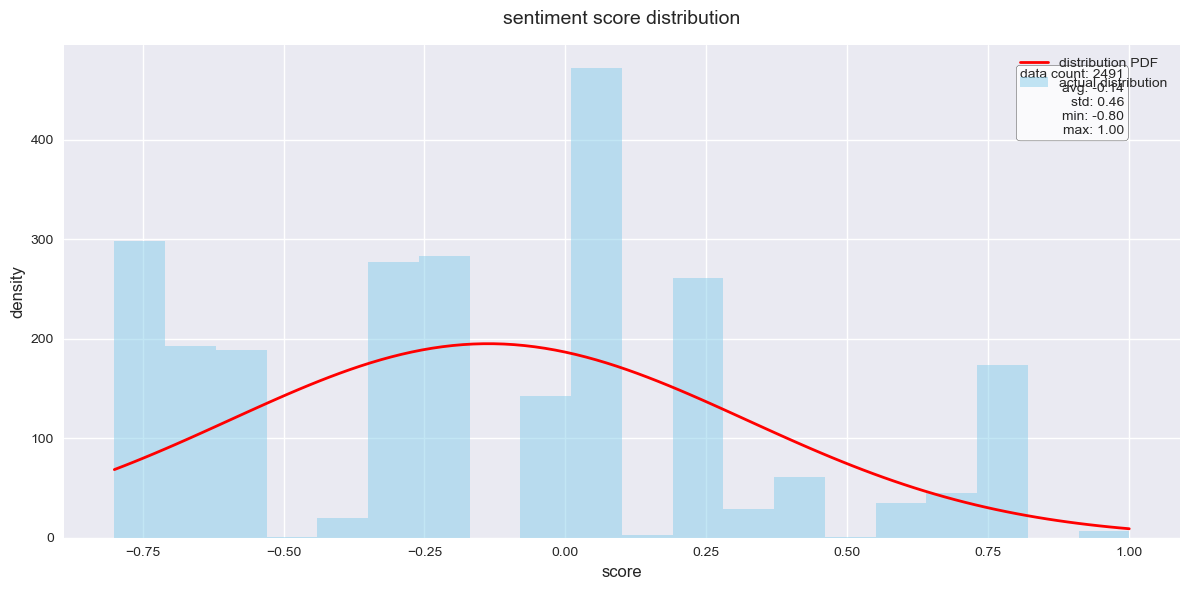

In [ ]:
# 設置圖表風格和大小
plt.figure(figsize=(12, 6))

# 繪製直方圖
counts, bins, _ = plt.hist(
    sentiment_series, bins=20, alpha=0.5, color="skyblue", label="actual distribution"
)

# 為了讓常態分布曲線與計數對齊，需要調整其比例
bin_width = bins[1] - bins[0]
scale_factor = len(sentiment_series) * bin_width
x = np.linspace(sentiment_series.min(), sentiment_series.max(), 100)
mean = sentiment_series.mean()
std = sentiment_series.std()
y = stats.norm.pdf(x, mean, std) * scale_factor
plt.plot(x, y, "r-", label="distribution PDF", linewidth=2)

# 添加標題和標籤
plt.title("sentiment score distribution", fontsize=14, pad=15)
plt.xlabel("score", fontsize=12)
plt.ylabel("density", fontsize=12)
plt.legend(fontsize=10)

# 添加描述性統計信息
stats_text = f"data count: {len(sentiment_series)}\navg: {mean:.2f}\nstd: {std:.2f}\nmin: {sentiment_series.min():.2f}\nmax: {sentiment_series.max():.2f}"
plt.text(
    0.95,
    0.95,
    stats_text,
    transform=plt.gca().transAxes,
    verticalalignment="top",
    horizontalalignment="right",
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.8),
)

# 調整布局
plt.tight_layout()

# 顯示圖表
plt.show()

簡易版

In [13]:
def calculate_daily_sentiment(df):
    # 將日期欄位轉換為日期格式
    df["date"] = pd.to_datetime(df["date"])

    # 按日期分組並計算平均值和新聞數量
    daily_stats = df.groupby(df["date"].dt.date).agg({"llama_score": ["mean", "count"]})

    # 重新命名欄位
    daily_stats.columns = ["sentiment_avg", "news_count"]

    return daily_stats

df_all保留極值 = df_all[
    (df_all["llama_score"] >= 0.2) | (df_all["llama_score"] <= -0.2)
]
# 計算並顯示結果
df_all每天平均 = calculate_daily_sentiment(df_all保留極值)
df_all每天平均.head()

,sentiment_avg,news_count
date,,
2018-01-01,-0.600000,1
2018-01-02,0.511111,9
2018-01-03,0.554545,11
2018-01-04,0.809091,11
2018-01-05,0.312778,18


擴充版

In [14]:
import pandas as pd
import numpy as np
from scipy import stats


def calculate_daily_sentiment(df):
    """
    計算每日新聞情緒的詳細統計數據

    Parameters:
    df (pandas.DataFrame): 包含 'date+1' 和 'llama_score' 欄位的資料框

    Returns:
    pandas.DataFrame: 包含各種統計指標的每日統計資料
    """
    # 將日期欄位轉換為日期格式
    df["date"] = pd.to_datetime(df["date"])

    # 定義要計算的聚合函數
    agg_functions = {
        "llama_score": [
            ("sentiment_avg", "mean"),
            ("sentiment_median", "median"),
            ("sentiment_std", "std"),
            ("sentiment_sum", lambda x: x.sum()),
            ("sentiment_min", lambda x: x.min()),
            ("sentiment_max", lambda x: x.max()),
            ("sentiment_q25", lambda x: x.quantile(0.25)),
            ("sentiment_q75", lambda x: x.quantile(0.75)),
            ("sentiment_skew", stats.skew),
            ("sentiment_kurtosis", stats.kurtosis),
            ("news_count", "count"),
        ]
    }

    # 按日期分組並計算統計量
    daily_stats = df.groupby(df["date"].dt.date).agg(
        {col: funcs for col, funcs in agg_functions.items()}
    )

    # 重新命名欄位
    daily_stats.columns = [func[0] for func in agg_functions["llama_score"]]

    # 計算情緒波動範圍
    daily_stats["sentiment_range"] = (
        daily_stats["sentiment_max"] - daily_stats["sentiment_min"]
    )

    # 計算四分位距
    daily_stats["sentiment_iqr"] = (
        daily_stats["sentiment_q75"] - daily_stats["sentiment_q25"]
    )

    # 計算變異係數 (CV)
    daily_stats["sentiment_cv"] = (
        daily_stats["sentiment_std"] / daily_stats["sentiment_avg"]
    ).abs()

    # 標記極端值的天數
    z_scores = np.abs(stats.zscore(daily_stats["sentiment_avg"]))
    daily_stats["is_extreme_day"] = z_scores > 2

    # 計算移動平均和標準差 (5天窗口)
    daily_stats["sentiment_ma5"] = daily_stats["sentiment_avg"].rolling(window=5).mean()
    daily_stats["sentiment_std5"] = daily_stats["sentiment_avg"].rolling(window=5).std()

    return daily_stats


def analyze_sentiment_distribution(daily_stats):
    """
    分析情緒分布的特徵並返回摘要統計

    Parameters:
    daily_stats (pandas.DataFrame): 每日情緒統計資料

    Returns:
    dict: 情緒分布的摘要統計
    """
    summary = {
        "total_days": len(daily_stats),
        "total_news": daily_stats["news_count"].sum(),
        "avg_daily_news": daily_stats["news_count"].mean(),
        "most_positive_day": daily_stats["sentiment_avg"].idxmax(),
        "most_negative_day": daily_stats["sentiment_avg"].idxmin(),
        "extreme_days_count": daily_stats["is_extreme_day"].sum(),
        "avg_sentiment": daily_stats["sentiment_avg"].mean(),
        "overall_std": daily_stats["sentiment_avg"].std(),
        "distribution_skewness": daily_stats["sentiment_skew"].mean(),
        "distribution_kurtosis": daily_stats["sentiment_kurtosis"].mean(),
    }

    return summary

df_all保留極值 = df_all[
    (df_all["llama_score"] <= 0) | (df_all["llama_score"] >= 0)
]
# 計算並顯示結果
df_all每天平均 = calculate_daily_sentiment(df_all保留極值)

# 獲取整體分析摘要
summary = analyze_sentiment_distribution(df_all每天平均)

# 查看結果
print("每日統計：")
df_all每天平均.head()

每日統計：


,sentiment_avg,sentiment_median,sentiment_std,sentiment_sum,sentiment_min,sentiment_max,sentiment_q25,sentiment_q75,sentiment_skew,sentiment_kurtosis,news_count,sentiment_range,sentiment_iqr,sentiment_cv,is_extreme_day,sentiment_ma5,sentiment_std5
date,,,,,,,,,,,,,,,,,
2018-01-01,-0.200000,-0.20,NaN,-0.20,-0.2,-0.2,-0.20,-0.2000,NaN,NaN,1,0.0,0.0000,NaN,False,NaN,NaN
2018-01-02,0.195625,0.02,0.382953,3.13,-0.2,0.8,-0.02,0.4250,0.794715,-0.959522,16,1.0,0.4450,1.957587,False,NaN,NaN
2018-01-03,0.278750,0.20,0.382864,4.46,-0.2,0.8,0.02,0.8000,0.479388,-1.344520,16,1.0,0.7800,1.373504,False,NaN,NaN
2018-01-04,0.172941,0.02,0.414891,2.94,-0.7,0.8,0.02,0.2000,0.167063,-0.189940,17,1.5,0.1800,2.399030,False,NaN,NaN
2018-01-05,0.107500,0.02,0.450367,2.15,-0.7,0.8,-0.20,0.2725,0.084820,-0.531417,20,1.5,0.4725,4.189459,False,0.110963,0.184304


In [15]:
print("\n整體分析摘要：")
summary


整體分析摘要：


{'total_days': 132,
 'total_news': 1877,
 'avg_daily_news': 14.219696969696969,
 'most_positive_day': datetime.date(2018, 4, 1),
 'most_negative_day': datetime.date(2018, 3, 25),
 'extreme_days_count': 5,
 'avg_sentiment': -0.11944649922580733,
 'overall_std': 0.35426773720002097,
 'distribution_skewness': 0.3720661956818685,
 'distribution_kurtosis': -0.4768950668994571}

129


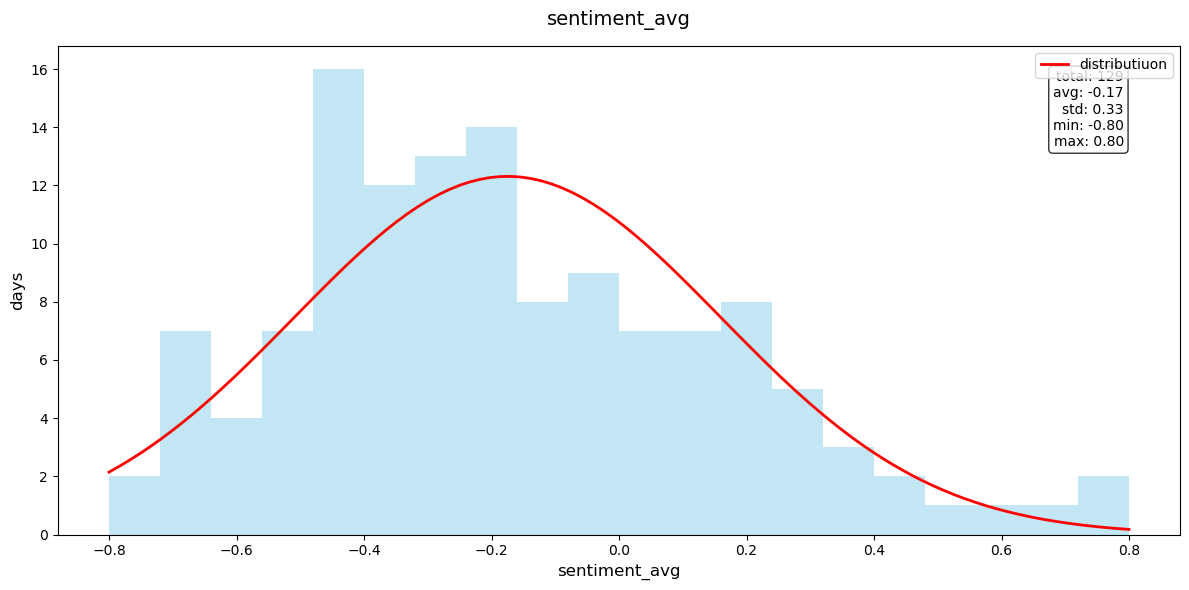

In [6]:
sentiment_series = df_all每天平均["sentiment_avg"]
print(len(sentiment_series))
# 設置圖表風格和大小
plt.figure(figsize=(12, 6))
# 繪製直方圖
counts, bins, _ = plt.hist(
    sentiment_series, bins=20, alpha=0.5, color="skyblue",# label="distributiuon"
)

# 為了讓常態分布曲線與計數對齊，需要調整其比例
bin_width = bins[1] - bins[0]
scale_factor = len(sentiment_series) * bin_width
x = np.linspace(sentiment_series.min(), sentiment_series.max(), 100)
mean = sentiment_series.mean()
std = sentiment_series.std()
y = stats.norm.pdf(x, mean, std) * scale_factor
plt.plot(x, y, "r-", label="distributiuon", linewidth=2)

# 添加標題和標籤
plt.title("sentiment_avg", fontsize=14, pad=15)
plt.xlabel("sentiment_avg", fontsize=12)
plt.ylabel("days", fontsize=12)
plt.legend(fontsize=10)

# 添加描述性統計信息
stats_text = f"total: {len(sentiment_series)}\navg: {mean:.2f}\nstd: {std:.2f}\nmin: {sentiment_series.min():.2f}\nmax: {sentiment_series.max():.2f}"
plt.text(
    0.95,
    0.95,
    stats_text,
    transform=plt.gca().transAxes,
    verticalalignment="top",
    horizontalalignment="right",
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.8),
)

# 調整布局
plt.tight_layout()

# 顯示圖表
plt.show()

平均每天分數-保留0.3以上  
平均每天分數-保留0.2以上  
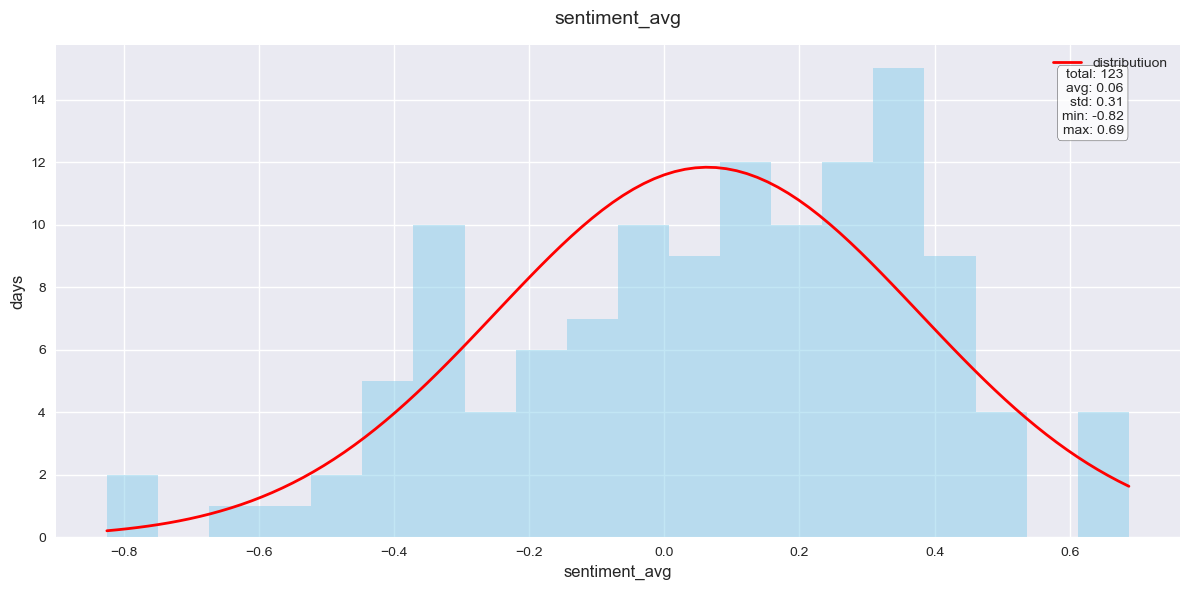  
平均每天分數-保留0.1以上  
平均每天分數-完整保留  

In [15]:
df_加入道瓊=pd.DataFrame(df_all每天平均)
df_加入道瓊 = df_加入道瓊.reset_index()
df_加入道瓊

,date,sentiment_avg,sentiment_median,sentiment_std,sentiment_sum,sentiment_min,sentiment_max,sentiment_q25,sentiment_q75,sentiment_skew,sentiment_kurtosis,news_count,sentiment_range,sentiment_iqr,sentiment_cv,is_extreme_day,sentiment_ma5,sentiment_std5
0,2018-01-01,-0.200000,-0.20,NaN,-0.20,-0.20,-0.20,-0.20,-0.2000,NaN,NaN,1,0.00,0.0000,NaN,False,NaN,NaN
1,2018-01-02,0.195625,0.02,0.382953,3.13,-0.20,0.80,-0.02,0.4250,0.794715,-0.959522,16,1.00,0.4450,1.957587,False,NaN,NaN
2,2018-01-03,0.278750,0.20,0.382864,4.46,-0.20,0.80,0.02,0.8000,0.479388,-1.344520,16,1.00,0.7800,1.373504,False,NaN,NaN
3,2018-01-04,0.172941,0.02,0.414891,2.94,-0.70,0.80,0.02,0.2000,0.167063,-0.189940,17,1.50,0.1800,2.399030,False,NaN,NaN
4,2018-01-05,0.107500,0.02,0.450367,2.15,-0.70,0.80,-0.20,0.2725,0.084820,-0.531417,20,1.50,0.4725,4.189459,False,0.110963,0.184304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,2018-05-26,-0.020000,-0.02,NaN,-0.02,-0.02,-0.02,-0.02,-0.0200,NaN,NaN,1,0.00,0.0000,NaN,False,-0.232114,0.239990
131,2018-05-28,0.001000,-0.11,0.437326,0.01,-0.70,0.70,-0.20,0.1575,0.412884,-0.523959,10,1.40,0.3575,437.326474,False,-0.242581,0.225109
132,2018-05-29,-0.326154,-0.70,0.458304,-4.24,-0.80,0.23,-0.70,0.2000,0.193209,-1.872068,13,1.03,0.9000,1.405177,False,-0.205725,0.181068
133,2018-05-30,-0.295185,-0.70,0.542795,-7.97,-0.80,0.80,-0.70,0.0250,0.695335,-0.831811,27,1.60,0.7250,1.838827,False,-0.203362,0.179486


In [18]:
import yfinance as yf
# df_dow = yf.download("YM=F", start="2006-10-23", end="2013-11-20")
df_dow = yf.download("^DJI", start="2018-01-02", end="2018-06-02")
df_dow = df_dow.reset_index()
df_dow.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,24809.349609,24864.189453,24741.699219,24824.009766,24824.009766,341130000
1,2018-01-03,24850.449219,24941.919922,24825.550781,24922.679688,24922.679688,456790000
2,2018-01-04,24964.859375,25105.960938,24963.269531,25075.130859,25075.130859,403280000
3,2018-01-05,25114.919922,25299.789062,25112.009766,25295.869141,25295.869141,358020000
4,2018-01-08,25308.400391,25311.990234,25235.410156,25283.000000,25283.000000,341390000


In [27]:
# 將 df_加入道瓊 的日期轉換為與 df_dow 相同的格式
df_加入道瓊["date"] = pd.to_datetime(df_加入道瓊["date"])
df_dow["Date"] = pd.to_datetime(df_dow["Date"])

# 使用 merge 來合併資料，how='left' 確保保留 df_dow 的所有資料
result = pd.merge(
    df_dow[["Date", "Close"]],
    df_加入道瓊,
    left_on="Date",
    right_on="date",
    how="left",
)

# 移除多餘的 Date 欄位，只保留需要的欄位
result = result[
    [
        "date",
        "sentiment_avg",
        "sentiment_median",
        "sentiment_std",
        "sentiment_min",
        "sentiment_max",
        "sentiment_q25",
        "sentiment_q75",
        "sentiment_skew",
        "sentiment_kurtosis",
        "news_count",
        "Close",
    ]
]
result.head(3)

,date,sentiment_avg,sentiment_median,sentiment_std,sentiment_min,sentiment_max,sentiment_q25,sentiment_q75,sentiment_skew,sentiment_kurtosis,news_count,Close
0,2018-01-02,0.511111,0.4,0.261937,0.2,0.8,0.30,0.8,0.049364,-1.709625,9.0,24824.009766
1,2018-01-03,0.554545,0.8,0.413192,-0.2,0.8,0.45,0.8,-1.185184,-0.396215,11.0,24922.679688
2,2018-01-04,0.809091,0.8,0.070065,0.7,1.0,0.80,0.8,1.723715,3.709877,11.0,25075.130859


In [8]:
import yfinance as yf

# df_dow = yf.download("YM=F", start="2006-10-23", end="2013-11-20")
df_es = yf.download("ES=F", start="2018-01-02", end="2018-06-02")
df_es = df_es.reset_index()
df_es.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,2675.25,2696.00,2674.50,2693.00,2693.00,996265
1,2018-01-03,2693.75,2714.25,2692.25,2711.00,2711.00,1114548
2,2018-01-04,2710.25,2729.00,2708.50,2723.75,2723.75,1166017
3,2018-01-05,2725.00,2743.25,2723.75,2742.50,2742.50,1136500
4,2018-01-08,2741.75,2748.50,2736.50,2746.75,2746.75,903544


In [16]:
# 將 df_加入道瓊 的日期轉換為與 df_es 相同的格式
df_加入道瓊["date"] = pd.to_datetime(df_加入道瓊["date"])
df_es["Date"] = pd.to_datetime(df_es["Date"])

# 使用 merge 來合併資料，how='left' 確保保留 df_es 的所有資料
result = pd.merge(
    df_es[["Date", "Close"]],
    df_加入道瓊,
    left_on="Date",
    right_on="date",
    how="left",
)

# 移除多餘的 Date 欄位，只保留需要的欄位
result = result[
    [
        "date",
        "sentiment_avg",
        "sentiment_sum",
        "sentiment_median",
        "sentiment_std",
        "sentiment_min",
        "sentiment_max",
        "sentiment_q25",
        "sentiment_q75",
        "sentiment_skew",
        "sentiment_kurtosis",
        "news_count",
        "Close",
    ]
]
result.head(3)

,date,sentiment_avg,sentiment_sum,sentiment_median,sentiment_std,sentiment_min,sentiment_max,sentiment_q25,sentiment_q75,sentiment_skew,sentiment_kurtosis,news_count,Close
0,2018-01-02,0.195625,3.13,0.02,0.382953,-0.2,0.8,-0.02,0.425,0.794715,-0.959522,16.0,2693.00
1,2018-01-03,0.278750,4.46,0.20,0.382864,-0.2,0.8,0.02,0.800,0.479388,-1.344520,16.0,2711.00
2,2018-01-04,0.172941,2.94,0.02,0.414891,-0.7,0.8,0.02,0.200,0.167063,-0.189940,17.0,2723.75


In [17]:
import pandas as pd
import numpy as np

# 假設 data 是你的 DataFrame
data = result.copy()
# 計算每日的漲跌幅度
def calc_change(data, days):
    return (data["Close"].shift(-days) - data["Close"]) / data["Close"] * 100

data["%_last_3d"] = calc_change(data, -3)
data["%_last_1d"] = calc_change(data, -1)
data["%_1d"] = calc_change(data, 1)
data["%_3d"] = calc_change(data, 3)
data["%_5d"] = calc_change(data, 5)

# 計算最大跌幅與漲幅
def calc_max_drawdown(data, days):
    return (
        (data["Close"].rolling(window=days).min().shift(-days + 1) - data["Close"])
        / data["Close"]
        * 100
    )


def calc_max_rise(data, days):
    return (
        (data["Close"].rolling(window=days).max().shift(-days + 1) - data["Close"])
        / data["Close"]
        * 100
    )


data["%_3d_down"] = calc_max_drawdown(data, 3)
data["%_3d_up"] = calc_max_rise(data, 3)
data["%_5d_down"] = calc_max_drawdown(data, 5)
data["%_5d_up"] = calc_max_rise(data, 5)


# 計算標準差百分比
def calc_std_percent(data, days):
    return (
        data["Close"].rolling(window=abs(days)).std().shift(-days + 1) / data["Close"]
    ) * 100


data["%_last_3d_std%"] = calc_std_percent(data, -3)
data["%_last_5d_std%"] = calc_std_percent(data, -5)
data["%_3d_std%"] = calc_std_percent(data, 3)
data["%_5d_std%"] = calc_std_percent(data, 5)

data.iloc[10:14]

,date,sentiment_avg,sentiment_sum,sentiment_median,sentiment_std,sentiment_min,sentiment_max,sentiment_q25,sentiment_q75,sentiment_skew,...,%_3d,%_5d,%_3d_down,%_3d_up,%_5d_down,%_5d_up,%_last_3d_std%,%_last_5d_std%,%_3d_std%,%_5d_std%
10,2018-01-17,-0.215000,-3.87,-0.250,0.273845,-0.7,0.23,-0.300,-0.020,-0.547095,...,1.123495,1.328578,-0.267499,0.258582,-0.267499,1.275078,0.100221,0.795146,0.263053,0.686366
11,2018-01-18,0.068125,1.09,0.015,0.440306,-0.7,0.80,-0.005,0.065,0.202164,...,1.546714,1.609298,0.000000,1.394725,0.000000,1.600358,0.375538,0.617901,0.704225,0.713694
12,2018-01-19,-0.102083,-2.45,0.025,0.433860,-0.7,0.80,-0.400,0.070,0.152574,...,1.067236,2.258983,0.000000,1.013874,0.000000,1.076129,0.680368,0.408168,0.546964,0.457508
13,2018-01-22,-0.118333,-2.84,0.015,0.455313,-0.8,0.80,-0.375,0.020,0.253393,...,0.211622,0.643682,0.000000,0.202804,0.000000,1.384358,0.346363,0.363953,0.105197,0.562440


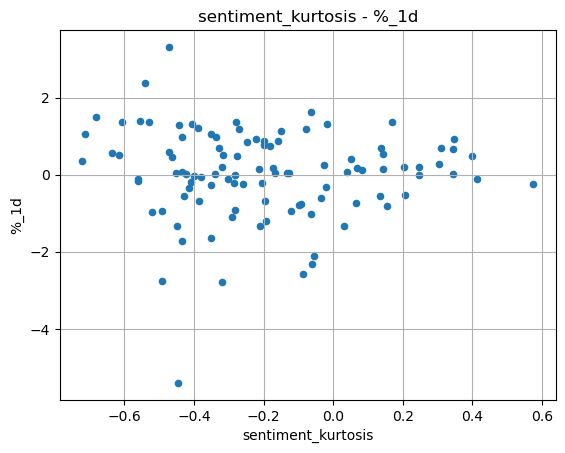

In [12]:
# 用data["news_count"] 和 data["%_3d"]繪製matplot scatter
import matplotlib.pyplot as plt

plt.scatter(data["sentiment_avg"], data["%_1d"], s=20)
plt.title("sentiment_kurtosis - %_1d")
plt.xlabel("sentiment_kurtosis")
plt.ylabel("%_1d")
plt.grid(1)
plt.show()

分數中位數-3天漲跌   
分數標準差-3天漲跌  

保留分數0.2以上的新聞-3天漲跌    
保留分數0.2以上的新聞-1天漲跌    

-0.4以下的負面新聞-5日標準差  
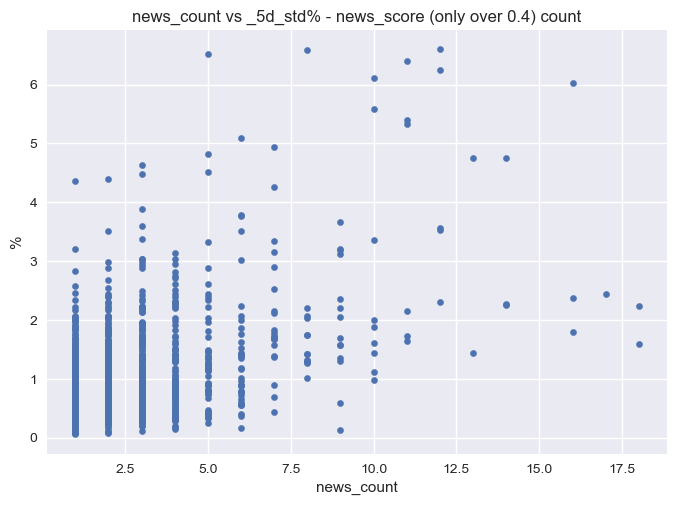  
0.4以上的正面新聞-5日標準差  
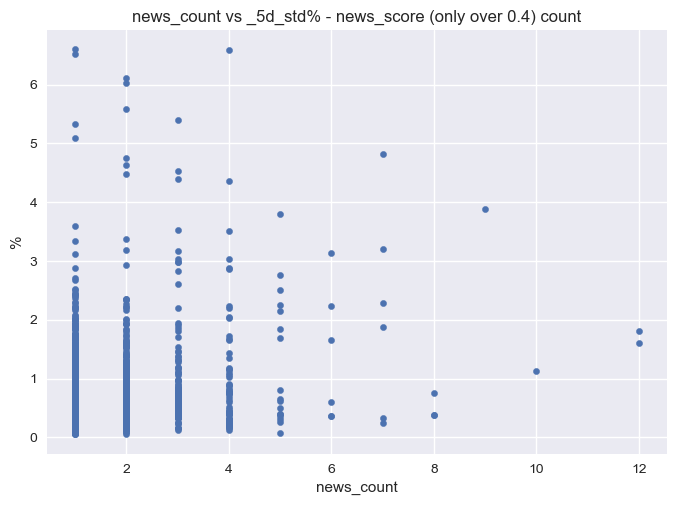  
0.2以上0.4以上的正負面新聞-5日標準差  
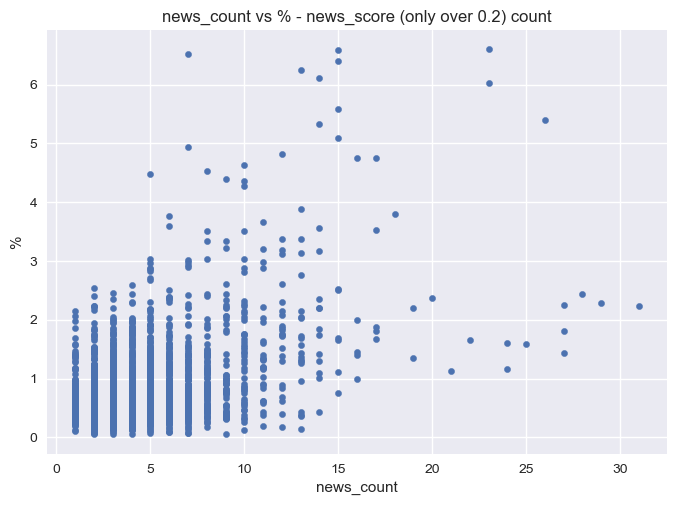  
0.2以上0.4以上的正負面新聞-5日標準差  
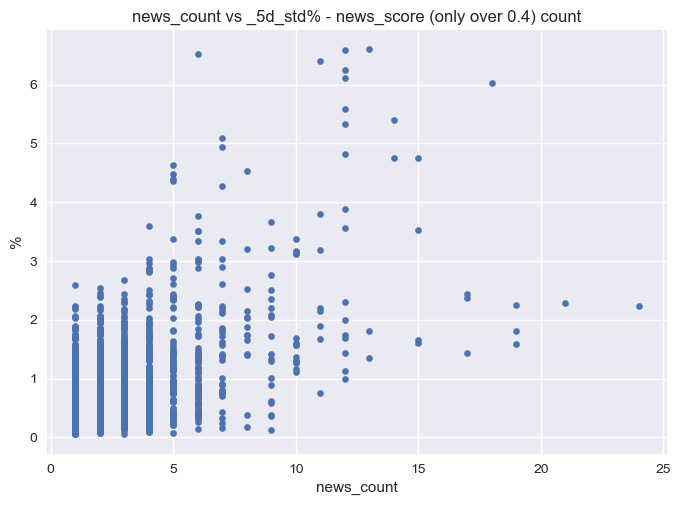  

保留分數0.3以上的新聞-5天標準差  
保留分數0.2以上的新聞-5天標準差  
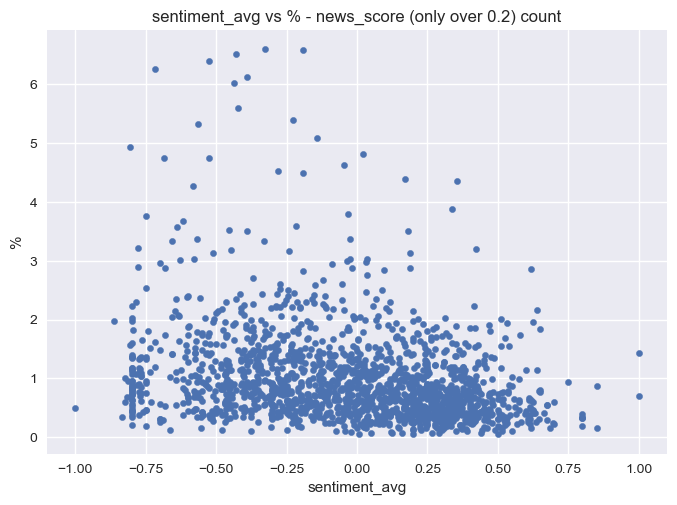  
保留分數0.2以上的新聞-3天標準差  

105


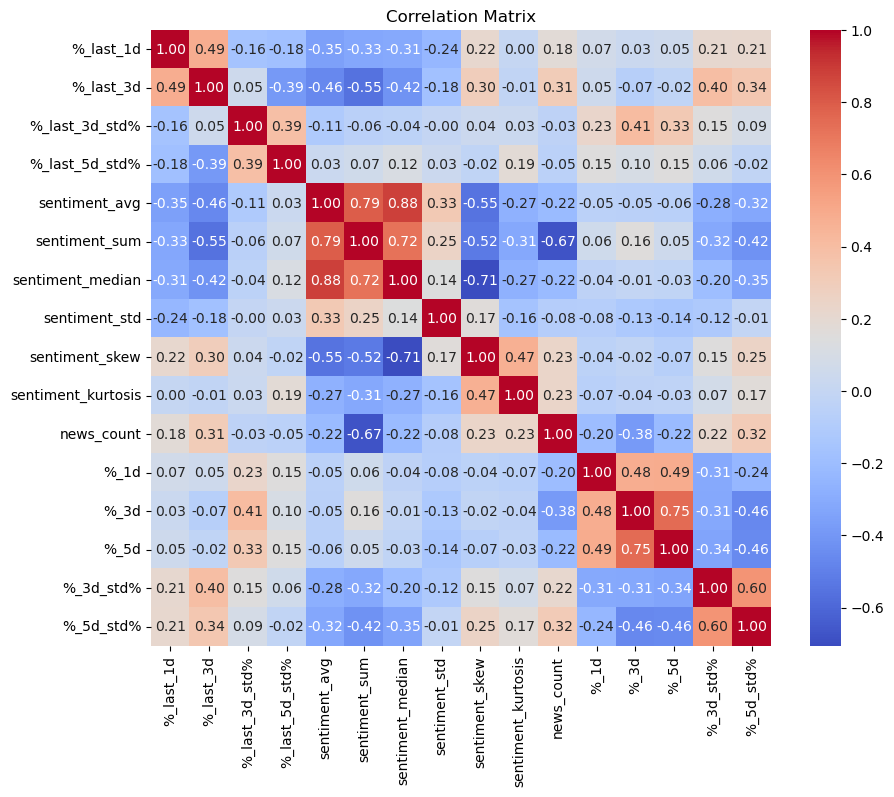

In [18]:
# 繪製相關係數矩陣
data_to_corr = data[
    [
        "%_last_1d",
        "%_last_3d",
        "%_last_3d_std%",
        "%_last_5d_std%",
        "sentiment_avg",
        "sentiment_sum",
        "sentiment_median",
        "sentiment_std",
        # "sentiment_min",
        # "sentiment_max",
        # "sentiment_q25",
        # "sentiment_q75",
        "sentiment_skew",
        "sentiment_kurtosis",
        "news_count",
        "%_1d",
        "%_3d",
        "%_5d",
        # "%_3d_down",
        # "%_3d_up",
        "%_3d_std%",
        # "%_5d_down",
        # "%_5d_up",
        "%_5d_std%",
    ]
]
data_to_corr.drop(
    data_to_corr[(data_to_corr["news_count"] <= 2)].index, inplace=True
)
print(len(data_to_corr))
# 計算相關係數矩陣
corr_matrix = data_to_corr.corr()

# 繪製熱圖
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Matrix")
plt.show()

2006-2013 Reuters over 0.4 只有正面  
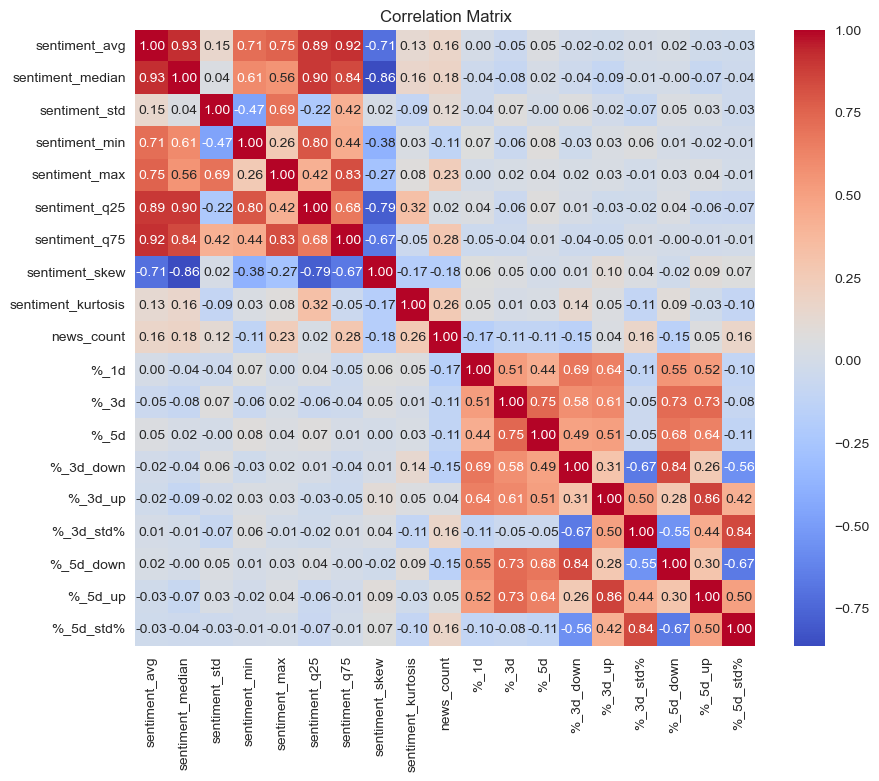  
2006-2013 Reuters over 0.4 只有負面  
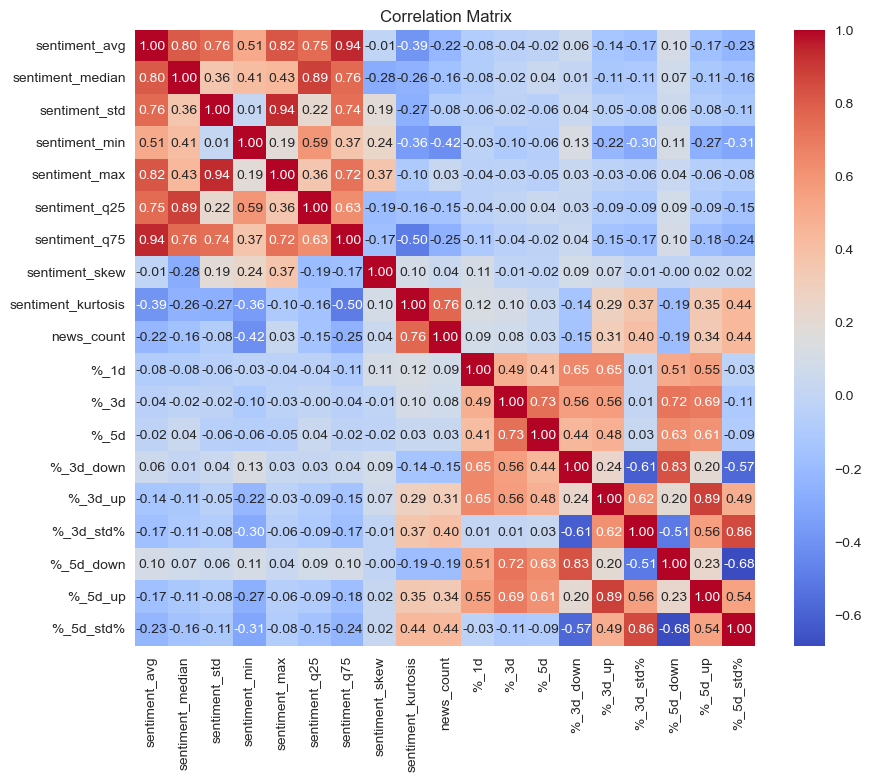  
2006-2013 Reuters over 0.4  
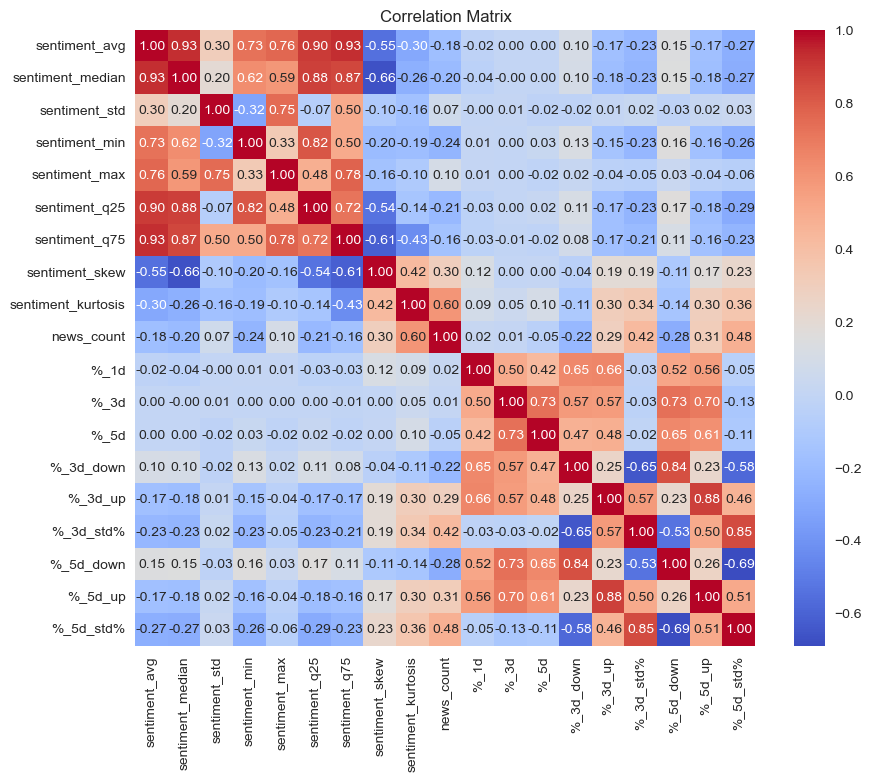  
2006-2013 Reuters over 0.2  
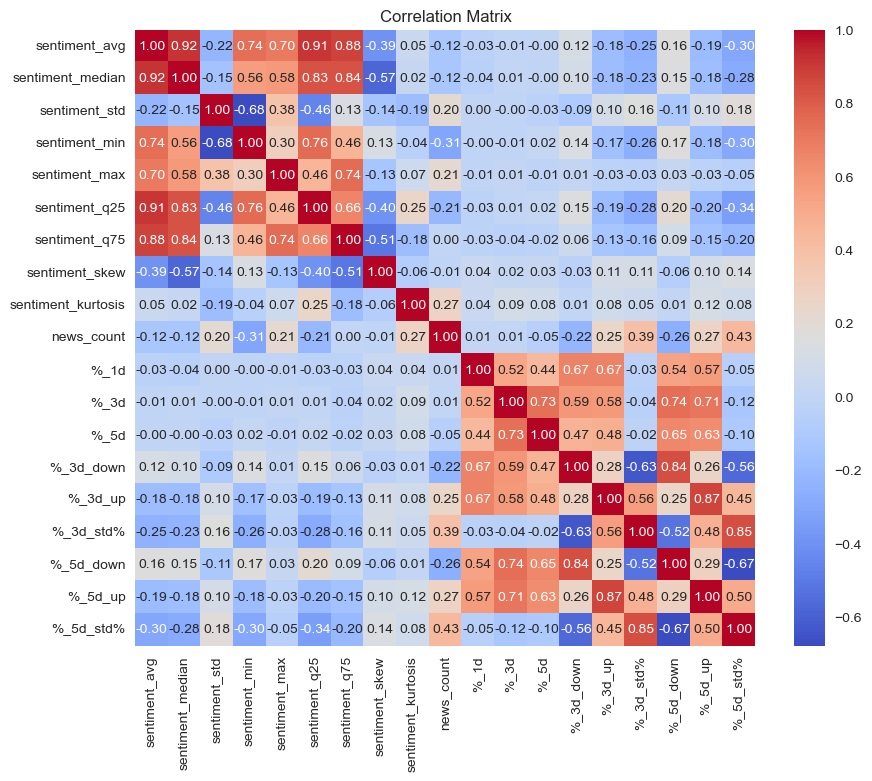  
2018Reuters  
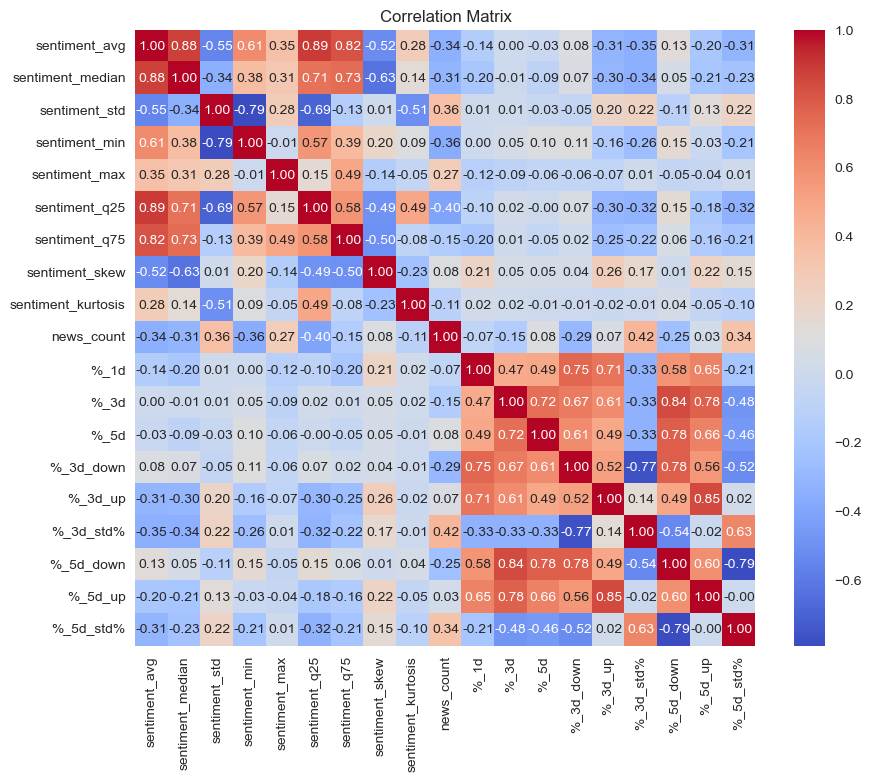  

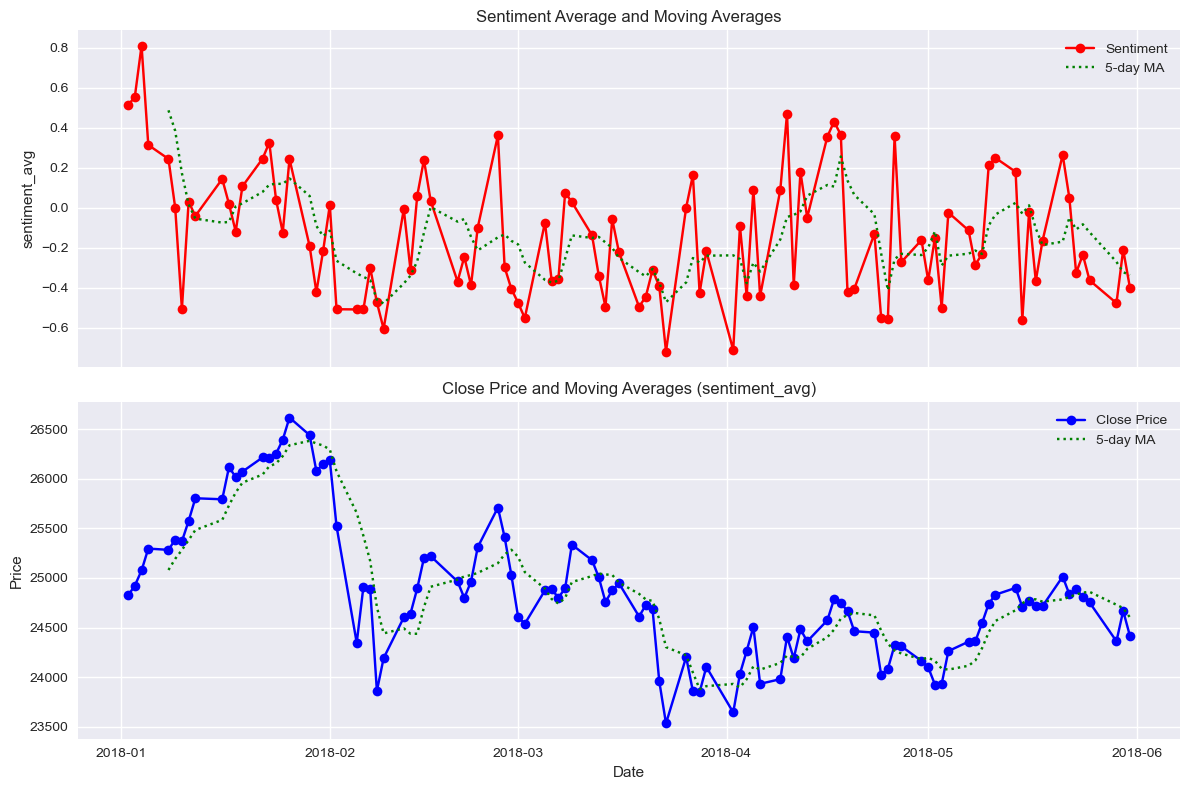

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 轉換成DataFrame
df = pd.DataFrame(data)
df["date"] = pd.to_datetime(df["date"])

# 計算移動平均線
df["sentiment_ma3"] = df["sentiment_avg"].rolling(window=3).mean()
df["sentiment_ma5"] = df["sentiment_avg"].rolling(window=5).mean()
df["close_ma3"] = df["Close"].rolling(window=3).mean()
df["close_ma5"] = df["Close"].rolling(window=5).mean()

# 創建圖表
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# 繪製sentiment圖
ax1.plot(df["date"], df["sentiment_avg"], label="Sentiment", color="red", marker="o")
# ax1.plot(df["date"], df["sentiment_ma3"], label="3-day MA", color="red", linestyle="--")
ax1.plot(
    df["date"], df["sentiment_ma5"], label="5-day MA", color="green", linestyle=":"
)
ax1.set_title("Sentiment Average and Moving Averages")
ax1.set_ylabel("sentiment_avg")
ax1.grid(True)
ax1.legend()

# 繪製Close價格圖
ax2.plot(df["date"], df["Close"], label="Close Price", color="blue", marker="o")
# ax2.plot(df["date"], df["close_ma3"], label="3-day MA", color="red", linestyle="--")
ax2.plot(df["date"], df["close_ma5"], label="5-day MA", color="green", linestyle=":")
ax2.set_title("Close Price and Moving Averages (sentiment_avg)")
ax2.set_ylabel("Price")
ax2.grid(True)
ax2.legend()

# 調整布局
plt.xlabel("Date")
plt.tight_layout()
plt.show()

CNBC+Reuters  
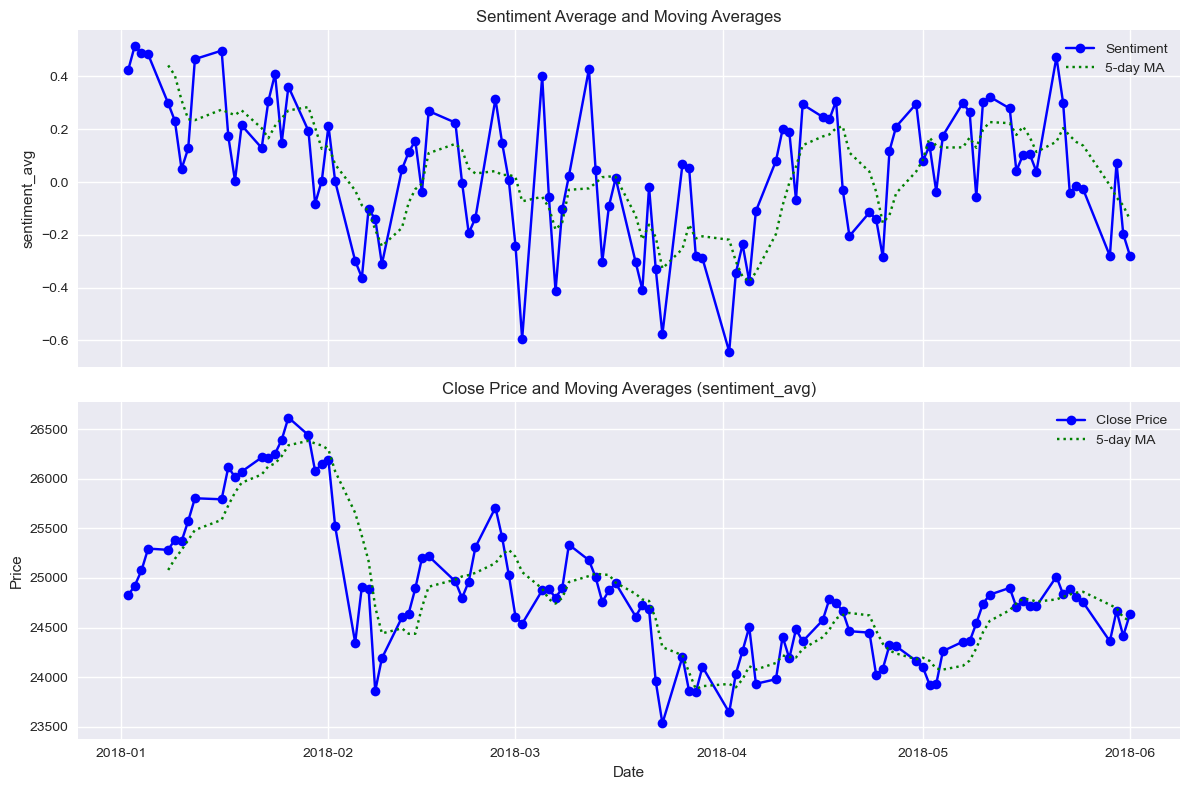
只有CNBC  
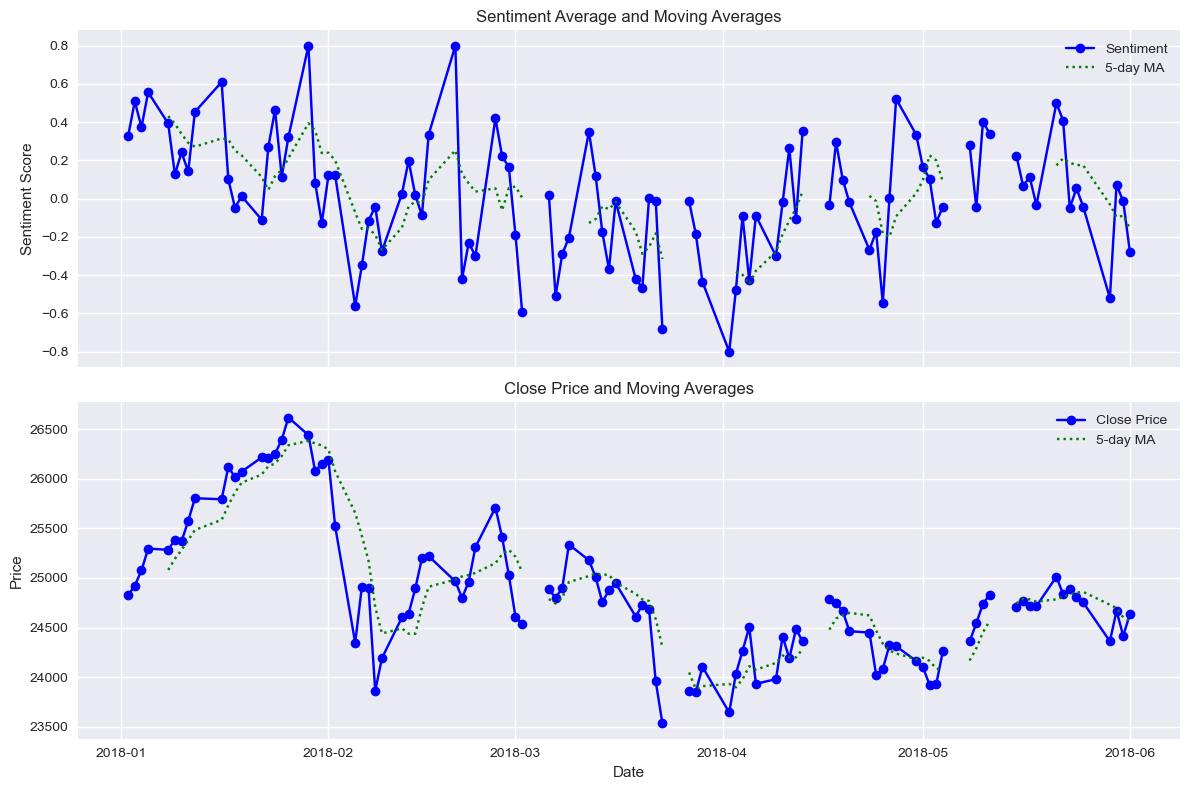  
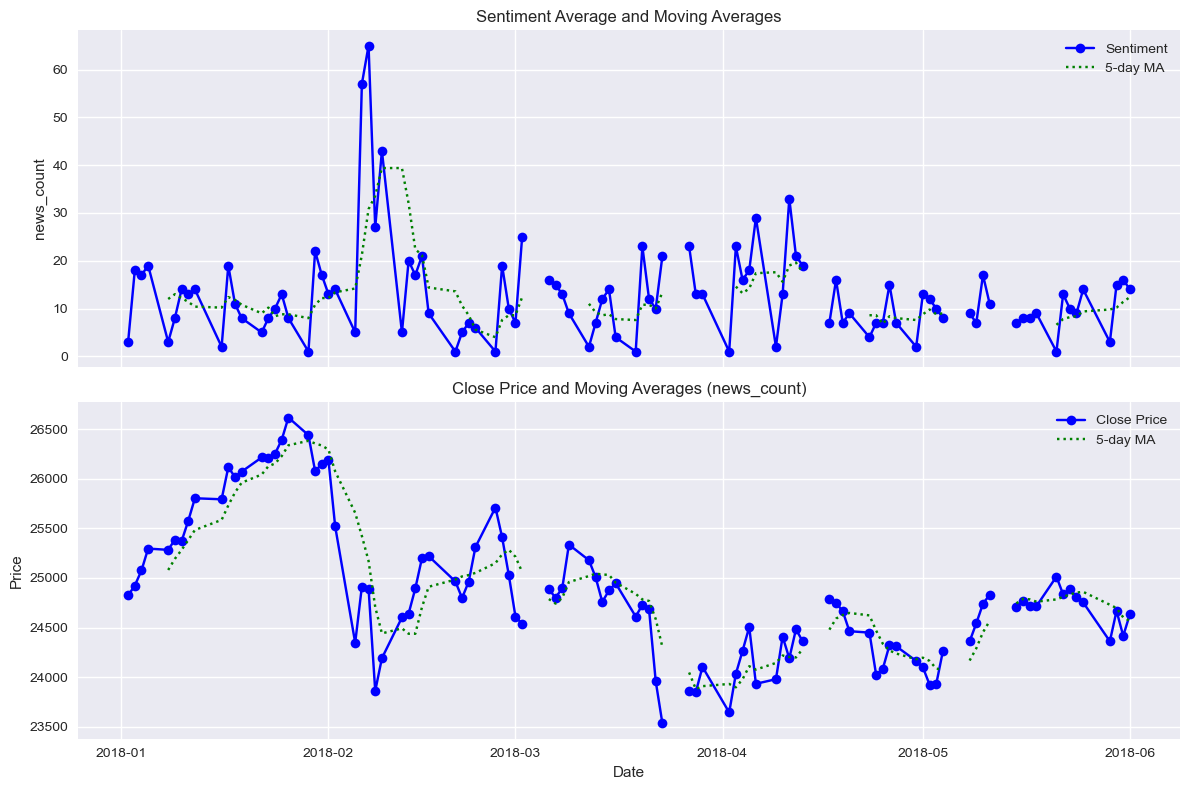  



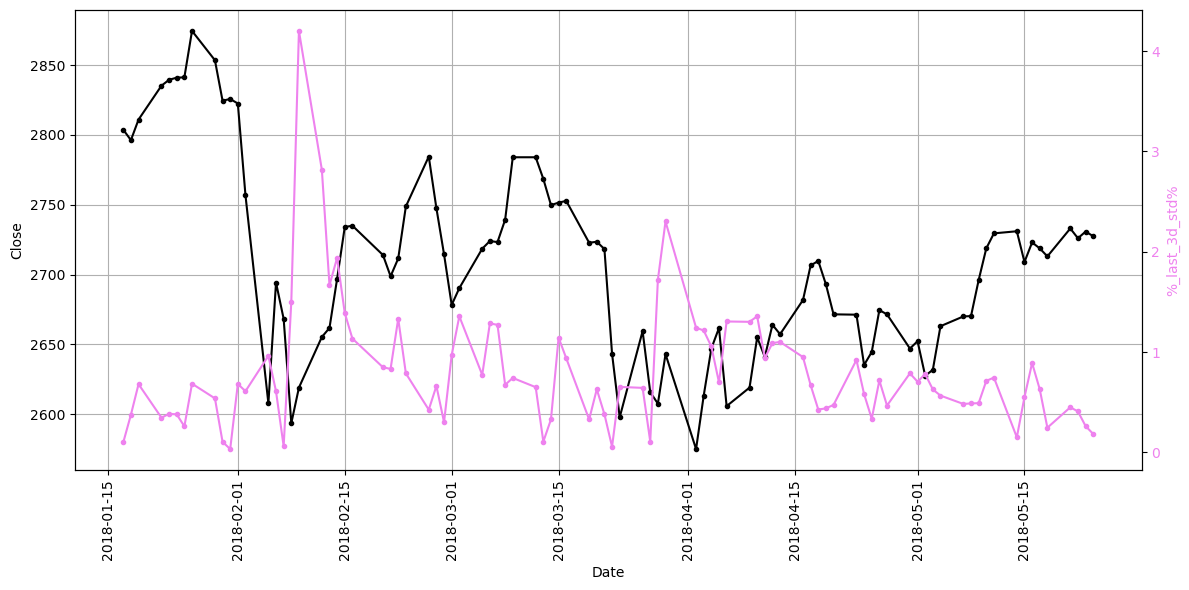

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# 假設 data 已存在
df = pd.DataFrame(data)
df = df.dropna()

plt.style.use("default")

# 創建圖形和坐標軸對象
x = df["date"]
y1 = df["Close"]
y2 = df["sentiment_avg"]
y3 = df["sentiment_sum"]
y4 = df["news_count"]
y5 = df["sentiment_kurtosis"]
y6 = df["%_last_3d_std%"]

# 建立圖表和第一個 Y 軸，設置圖表大小
fig, ax1 = plt.subplots(figsize=(12, 6))

# 設置第一個 Y 軸的資料
ax1.plot(x, y1, color="black", label="Close",marker='.')
ax1.set_xlabel("Date")  # 設置 X 軸標籤
ax1.set_ylabel("Close", color="black")  # 設置第一個 Y 軸標籤
ax1.tick_params(axis="y", labelcolor="black")
ax1.tick_params(axis="x", rotation=90)  # X 軸標籤旋轉
ax1.grid(True)  # 加入網格線

# 創建第二個 Y 軸，共用相同的 X 軸
# ax2 = ax1.twinx()
# ax2.plot(x, y2, color="r", label="sentiment_avg", marker=".")
# ax2.set_ylabel("news_avg", color="r")  # 設置第二個 Y 軸標籤
# ax2.tick_params(axis="y", labelcolor="r")
# 創建第二個 Y 軸，共用相同的 X 軸
# ax3 = ax1.twinx()
# ax3.plot(x, y3, color="yellowgreen", label="news_sum", marker=".")
# ax3.set_ylabel("news_sum", color="g")  # 設置第二個 Y 軸標籤
# ax3.tick_params(axis="y", labelcolor="g")
# 創建第二個 Y 軸，共用相同的 X 軸
# ax4 = ax1.twinx()
# ax4.plot(x, y4, color="darkorange", label="news_count", marker=".")
# ax4.set_ylabel("news_count", color="darkorange")  # 設置第二個 Y 軸標籤
# ax4.tick_params(axis="y", labelcolor="darkorange")
# 創建第二個 Y 軸，共用相同的 X 軸
# ax5 = ax1.twinx()
# ax5.plot(x, y4, color="deepskyblue", label="sentiment_kurtosis", marker=".")
# ax5.set_ylabel("sentiment_kurtosis", color="deepskyblue")  # 設置第二個 Y 軸標籤
# ax5.tick_params(axis="y", labelcolor="deepskyblue")
# 創建第二個 Y 軸，共用相同的 X 軸
ax6 = ax1.twinx()
ax6.plot(x, y6, color="violet", label="%_last_3d_std%", marker=".")
ax6.set_ylabel("%_last_3d_std%", color="violet")  # 設置第二個 Y 軸標籤
ax6.tick_params(axis="y", labelcolor="violet")
# 自動調整間距，避免重疊
fig.tight_layout()

# 顯示圖表
plt.show()

In [36]:
data.columns

Index(['date', 'sentiment_avg', 'sentiment_median', 'sentiment_std',
       'sentiment_min', 'sentiment_max', 'sentiment_q25', 'sentiment_q75',
       'sentiment_skew', 'sentiment_kurtosis', 'news_count', 'Close', '%_1d',
       '%_3d', '%_5d', '%_3d_down', '%_3d_up', '%_5d_down', '%_5d_up',
       '%_3d_std%', '%_5d_std%', 'sentiment_ma3', 'sentiment_ma5', 'close_ma3',
       'close_ma5'],
      dtype='object')

In [37]:
data.describe()

,sentiment_avg,sentiment_median,sentiment_std,sentiment_min,sentiment_max,sentiment_q25,sentiment_q75,sentiment_skew,sentiment_kurtosis,news_count,...,%_3d_down,%_3d_up,%_5d_down,%_5d_up,%_3d_std%,%_5d_std%,sentiment_ma3,sentiment_ma5,close_ma3,close_ma5
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,...,103.000000,103.000000,101.000000,101.000000,103.000000,101.000000,102.000000,100.000000,103.000000,101.000000
mean,-0.138199,-0.187452,0.425362,-0.680769,0.610385,-0.447356,0.141779,0.401494,-0.373756,17.298077,...,-0.777878,0.736977,-1.267386,1.130869,0.794852,0.979325,-0.142757,-0.147899,24844.269070,24845.342427
std,0.314928,0.380763,0.124393,0.234863,0.343570,0.338165,0.415775,0.754196,1.279321,9.962921,...,1.244729,0.812461,1.700508,1.062377,0.555357,0.549229,0.226556,0.181686,657.271280,644.266821
min,-0.720000,-0.800000,0.070065,-0.800000,-0.300000,-0.800000,-0.725000,-1.887622,-1.832002,4.000000,...,-7.030134,0.000000,-7.030134,0.000000,0.087106,0.310743,-0.508844,-0.479713,23864.503255,23879.964062
25%,-0.394853,-0.550000,0.336366,-0.800000,0.400000,-0.700000,-0.200000,0.003483,-1.128421,11.000000,...,-1.104236,0.000000,-1.814908,0.000000,0.436081,0.622083,-0.324011,-0.272275,24335.446940,24336.896094
50%,-0.164583,-0.300000,0.441194,-0.800000,0.800000,-0.600000,0.200000,0.393253,-0.823892,15.000000,...,-0.050874,0.421140,-0.550675,1.071700,0.683093,0.835238,-0.166444,-0.163207,24761.563151,24768.132031
75%,0.062868,0.200000,0.500779,-0.700000,0.800000,-0.250000,0.425000,0.837374,-0.194746,21.000000,...,0.000000,1.227524,0.000000,1.819147,1.002960,1.106305,-0.007019,-0.036246,25116.290039,25080.137891
max,0.809091,0.800000,0.797392,0.700000,1.000000,0.800000,0.800000,2.439589,4.591427,59.000000,...,0.000000,3.104754,0.000000,4.329461,3.559650,3.048148,0.624916,0.486120,26482.993490,26382.382031


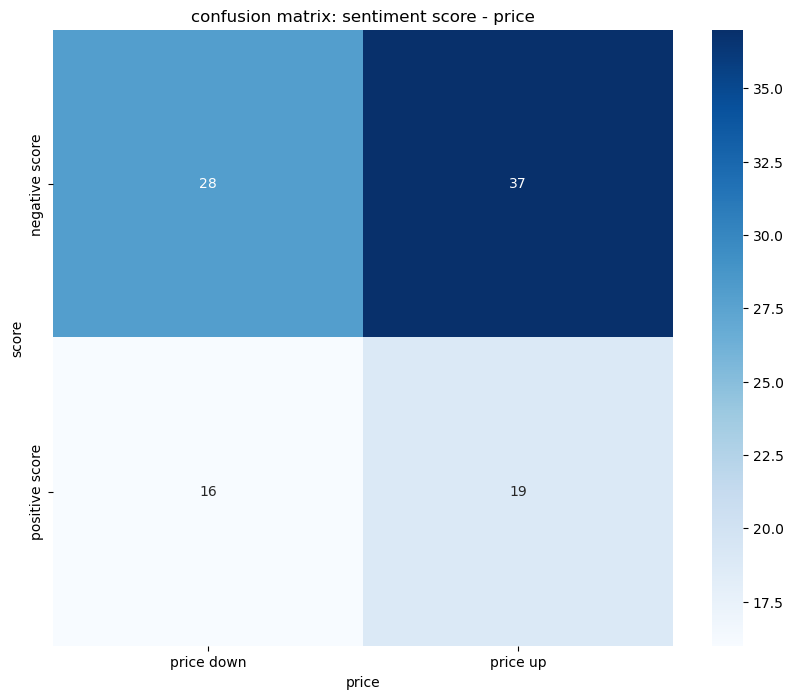


分析結果:
準確率 (Accuracy): 47.00%
精確率 (Precision): 33.93%
召回率 (Recall): 54.29%
F1分數: 41.76%

相關係數: -0.0173

方向性分析:
正確預測上漲次數: 19
正確預測下跌次數: 28
錯誤預測上漲次數: 37
錯誤預測下跌次數: 16


In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


def analyze_sentiment_price_relationship(data):
    """
    分析情感分數和價格變動的關係

    Parameters:
    data (pd.DataFrame): 包含 sentiment_avg 和 %_1d 的 DataFrame
    """
    # 將情感分數和價格變動轉換為二元類別
    sentiment_direction = (data["sentiment_avg"] > 0).astype(
        int
    )  # 1為正面情緒, 0為負面情緒
    price_direction = (data["%_3d"] > 0).astype(int)  # 1為上漲, 0為下跌

    # 計算混淆矩陣
    conf_matrix = confusion_matrix(sentiment_direction, price_direction)

    # 計算關鍵指標
    total = conf_matrix.sum()
    true_positive = conf_matrix[1, 1]  # 正確預測上漲
    true_negative = conf_matrix[0, 0]  # 正確預測下跌
    false_positive = conf_matrix[0, 1]  # 錯誤預測上漲
    false_negative = conf_matrix[1, 0]  # 錯誤預測下跌

    accuracy = (true_positive + true_negative) / total
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    f1_score = 2 * (precision * recall) / (precision + recall)

    # 繪製混淆矩陣熱圖
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        conf_matrix,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=["price down", "price up"],
        yticklabels=["negative score", "positive score"],
    )
    plt.title("confusion matrix: sentiment score - price")
    plt.ylabel("score")
    plt.xlabel("price")
    plt.show()

    # 計算相關係數
    correlation = data["sentiment_avg"].corr(data["%_3d"])

    # 打印分析結果
    print("\n分析結果:")
    print(f"準確率 (Accuracy): {accuracy:.2%}")
    print(f"精確率 (Precision): {precision:.2%}")
    print(f"召回率 (Recall): {recall:.2%}")
    print(f"F1分數: {f1_score:.2%}")
    print(f"\n相關係數: {correlation:.4f}")

    # 方向性分析明細
    print("\n方向性分析:")
    print(f"正確預測上漲次數: {true_positive}")
    print(f"正確預測下跌次數: {true_negative}")
    print(f"錯誤預測上漲次數: {false_positive}")
    print(f"錯誤預測下跌次數: {false_negative}")

    return {
        "confusion_matrix": conf_matrix,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1_score,
        "correlation": correlation,
    }


# 使用範例
results = analyze_sentiment_price_relationship(df)